### NAME : ASHISH G A

### COMPUTER VISION & IOT INTERNSHIP - THE SPARKS FOUNDATION

# OBJECTION DETECTION USING YOLO ALGORITHM

YOLO - YOU ONLY LOOK ONCE

In [1]:
#IMPORTING THE NECESSARY LIBRARIES
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#LOAD THE YOLO NETWORK
yolo = cv2.dnn.readNet("yolov3.weights" , "yolov3.cfg")

In [3]:
#LOAD COCO NAMES FILE INTO THE CLASS
classes = []
with open("coco.names" , 'r') as f:
    classes = f.read().splitlines()

In [4]:
#LENGHTH OF THE CLASS

len(classes)

80

In [5]:
#ASSIGN COLORS
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [6]:
#LIST OF NAMES WHICH YOLO ALGORITHM CAN DETECT FROM COCO
classes

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [7]:
#DEFINE HEIGHT, WIDTH AND CREATE BLOB IMAGE
img = cv2.imread("cars.jpg")
height, width, channels = img.shape
blob = cv2.dnn.blobFromImage(img, 1/255, (320,320) , (0,0,0) , swapRB=True, crop = False )

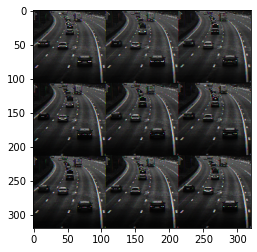

In [8]:
#TO PRINT A BLOBBED IMAGE

i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [9]:
#SETTING BLOB IMAGE AS INPUT
yolo.setInput(blob)

In [10]:
#SETTING AN OUTPUT LAYER
output_layer_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layer_name)

In [11]:
boxes = []
confidences = []
class_ids = []

for output in layeroutput:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.5:
            center_x = int(detection[0]*width)
            center_y = int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
            
            x = int(center_x- w/2)
            y = int(center_y- h/2)
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [12]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [13]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()